In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [3]:
ipl=pd.read_csv("IPL_Dataset (1).csv")

In [4]:
ipl.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [5]:
ipl.size

1862

In [6]:
ipl.shape

(133, 14)

In [7]:
ipl.describe()

,POS,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s
count,133.00000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,67.00000,9.631579,6.631579,1.616541,139.157895,19.366241,105.714286,107.364737,0.037594,0.827068,11.894737,5.518797
std,38.53786,4.893523,5.030925,1.550766,167.293103,18.053343,122.253870,44.584031,0.227170,1.351269,15.521375,7.393283
min,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.00000,5.000000,2.000000,0.000000,10.000000,6.000000,12.000000,88.750000,0.000000,0.000000,0.000000,0.000000
50%,67.00000,10.000000,5.000000,1.000000,59.000000,15.000000,53.000000,116.840000,0.000000,0.000000,5.000000,2.000000
75%,100.00000,14.000000,11.000000,2.000000,232.000000,29.900000,169.000000,137.500000,0.000000,1.000000,20.000000,9.000000
max,133.00000,17.000000,17.000000,7.000000,670.000000,101.000000,518.000000,191.420000,2.000000,5.000000,67.000000,30.000000


In [8]:
ipl.columns

Index(['POS', 'Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR',
       '100', '50', '4s', '6s'],
      dtype='object')

In [9]:
ipl.dtypes

POS         int64
Player     object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS         object
Avg       float64
BF          int64
SR        float64
100         int64
50          int64
4s          int64
6s          int64
dtype: object

In [10]:
ipl.isnull().sum() #checking for null values 

POS       0
Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

In [11]:
ipl_cat=ipl[[ i for i in ipl.columns if ipl[i].dtypes=="object"]] # for extracting categorical column

In [12]:
ipl_cat

,Player,HS
0,KL Rahul,132*
1,Shikhar Dhawan,106*
2,David Warner,85*
3,Shreyas Iyer,88*
4,Ishan Kishan,99
...,...,...
128,Khaleel Ahmed,0*
129,Arshdeep Singh,0*
130,Daniel Sams,0*
131,Shreevats Goswami,0*


In [13]:
ipl_num=ipl[[ i for i in ipl.columns if ipl[i].dtypes!="object"]] # for extracting numerical column

In [14]:
ipl_num.describe()

,POS,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s
count,133.00000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,67.00000,9.631579,6.631579,1.616541,139.157895,19.366241,105.714286,107.364737,0.037594,0.827068,11.894737,5.518797
std,38.53786,4.893523,5.030925,1.550766,167.293103,18.053343,122.253870,44.584031,0.227170,1.351269,15.521375,7.393283
min,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.00000,5.000000,2.000000,0.000000,10.000000,6.000000,12.000000,88.750000,0.000000,0.000000,0.000000,0.000000
50%,67.00000,10.000000,5.000000,1.000000,59.000000,15.000000,53.000000,116.840000,0.000000,0.000000,5.000000,2.000000
75%,100.00000,14.000000,11.000000,2.000000,232.000000,29.900000,169.000000,137.500000,0.000000,1.000000,20.000000,9.000000
max,133.00000,17.000000,17.000000,7.000000,670.000000,101.000000,518.000000,191.420000,2.000000,5.000000,67.000000,30.000000


<Axes: >

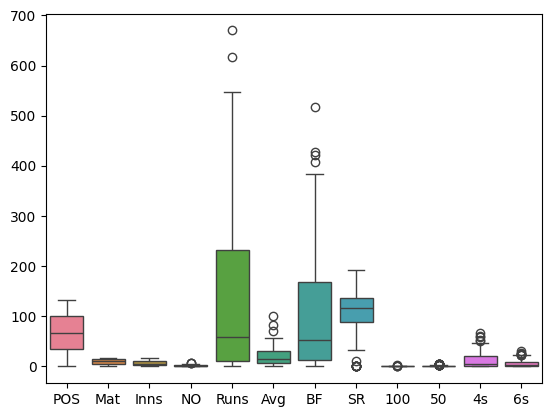

In [15]:
sns.boxplot(ipl_num) # for finding outliers in the data 

In [75]:
z_scores = ipl_num.apply(zscore)
outliers = ipl_num[(z_scores > 3) | (z_scores < -3)]

In [76]:
z_scores

,POS,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s
0,-1.719076,0.896069,1.470163,0.248205,3.185123,2.027415,3.385124,0.494759,4.252515,3.099833,2.981667,2.373410
1,-1.693030,1.511442,2.068729,0.895486,2.873116,1.377441,2.637957,0.841255,8.671144,2.356990,3.563705,0.879948
2,-1.666983,1.306318,1.869207,0.248205,2.453107,1.099437,2.473744,0.614085,-0.166114,2.356990,2.593642,1.151487
3,-1.640937,1.511442,2.068729,0.248205,2.279103,0.847010,2.588693,0.358097,-0.166114,1.614147,1.817592,1.423025
4,-1.614890,0.896069,1.270641,1.542766,2.261102,2.110816,2.038581,0.864445,-0.166114,2.356990,1.558908,3.323796
...,...,...,...,...,...,...,...,...,...,...,...,...
128,1.614890,-0.539801,-1.123624,-1.046356,-0.834966,-1.076779,-0.851559,-2.417248,-0.166114,-0.614381,-0.769243,-0.749283
129,1.640937,-0.334677,-1.123624,-1.046356,-0.834966,-1.076779,-0.843349,-2.417248,-0.166114,-0.614381,-0.769243,-0.749283
130,1.666983,-1.360298,-1.123624,-1.046356,-0.834966,-1.076779,-0.851559,-2.417248,-0.166114,-0.614381,-0.769243,-0.749283
131,1.693030,-1.565423,-0.924102,-1.046356,-0.834966,-1.076779,-0.835138,-2.417248,-0.166114,-0.614381,-0.769243,-0.749283


In [77]:
outliers.count()

POS     0
Mat     0
Inns    0
NO      1
Runs    1
Avg     2
BF      1
SR      0
100     4
50      3
4s      2
6s      1
dtype: int64

In [78]:
threshold = 3
df = ipl_num[(z_scores>threshold).all(axis=1)]

# Questions startes after EDA :-

## Q1-Maximum number of matches played by an individual player in a season?

In [79]:
ipl["Mat"].max() 

17

In [80]:
ipl_max_matches=ipl[ipl["Mat"]>16]

In [81]:
ipl_max_matches

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
19,20,Marcus Stoinis,17,17,3,352,65,25.14,237,148.52,0,3,31,16
67,68,Kagiso Rabada,17,8,4,56,15*,14.00,49,114.28,0,0,4,2


In [82]:
ipl_max_matches_new=ipl_max_matches[["Player","Mat"]].groupby("Player").sum()

In [83]:
ipl_max_matches_new

,Mat
Player,
Kagiso Rabada,17
Marcus Stoinis,17
Shikhar Dhawan,17
Shreyas Iyer,17


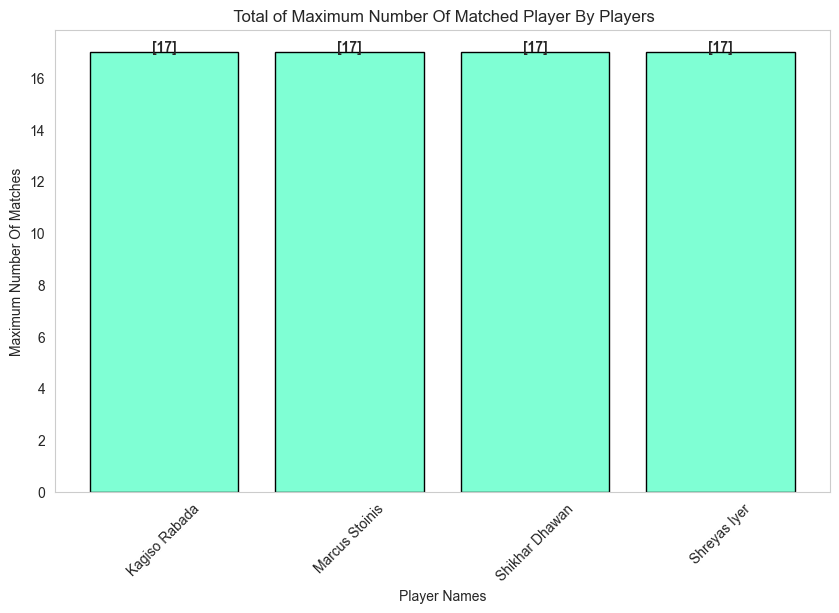

In [304]:
plt.figure(figsize=(10, 6))
plt.bar(x=ipl_max_matches_new.index, height=ipl_max_matches_new.Mat,color="aquamarine",edgecolor="black",linewidth=1)
for i ,v in enumerate(ipl_max_matches_new.values):
    plt.text(ipl_max_matches_new.index[i],ipl_max_matches_new.values[i],str(v),ha="center",weight="bold")
plt.xlabel('Player Names')
plt.ylabel('Maximum Number Of Matches')
plt.title(' Total of Maximum Number Of Matched Player By Players')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

## Q2- Highest average of a player in a season?

In [90]:
ipl["Avg"].max()

101.0

In [98]:
ipl_max_avg=ipl[ipl["Avg"]>100]

In [99]:
ipl_max_avg

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
57,58,Deepak Hooda,7,5,4,101,62*,101.0,71,142.25,0,1,5,5


In [100]:
ipl_max_avg_new=ipl_max_avg[["Player","Avg"]].groupby("Player").sum()

In [101]:
ipl_max_avg_new

,Avg
Player,
Deepak Hooda,101.0


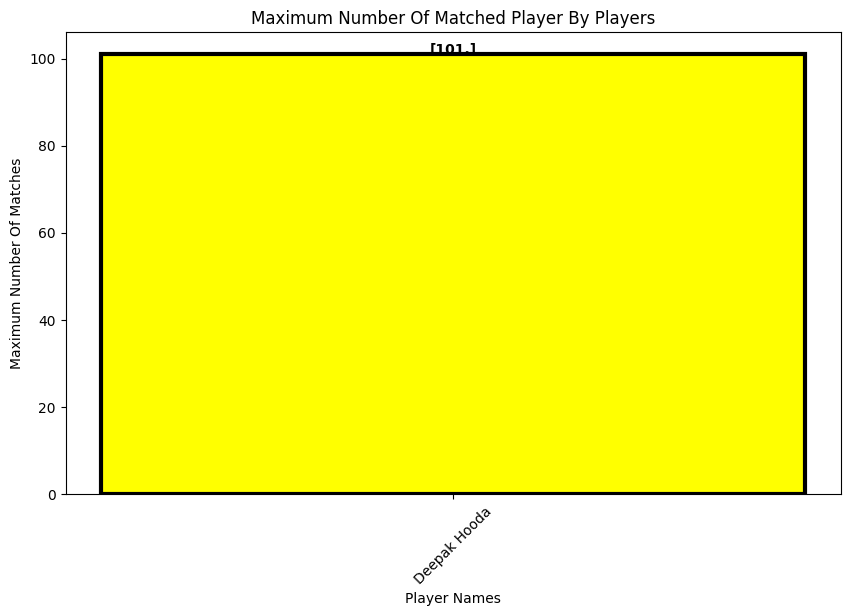

In [104]:
plt.figure(figsize=(10, 6))
plt.bar(x=ipl_max_avg_new.index, height=ipl_max_avg_new.Avg,color="yellow",edgecolor="black",linewidth=3)
for i ,v in enumerate(ipl_max_avg_new.values):
    plt.text(ipl_max_avg_new.index[i],ipl_max_avg_new.values[i],str(v),ha="center",weight="bold")
plt.xlabel('Player Names')
plt.ylabel('Maximum Number Of Matches')
plt.title('Maximum Number Of Matched Player By Players')
plt.xticks(rotation=45)
plt.show()

## Q3-  What is the average number of matches played by a player in a season?

In [109]:
Avg_matches=ipl["Mat"].mean()
Avg_matches

9.631578947368421

In [111]:
print("Average number of matches played by a player in a season is:", Avg_matches)

Average number of matches played by a player in a season is: 9.631578947368421


## Q4- Find correlation between all the features.

In [113]:
ipl_num.corr()

,POS,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s
POS,1.000000,-0.556695,-0.916174,-0.386247,-0.896664,-0.746510,-0.891969,-0.730489,-0.248353,-0.769577,-0.846965,-0.808756
Mat,-0.556695,1.000000,0.728358,0.555261,0.565237,0.306128,0.555102,0.371328,0.128405,0.455437,0.522628,0.523367
Inns,-0.916174,0.728358,1.000000,0.464356,0.895914,0.585148,0.889753,0.581468,0.224328,0.755027,0.846749,0.810922
NO,-0.386247,0.555261,0.464356,1.000000,0.308747,0.429888,0.271021,0.415060,0.019726,0.174184,0.204779,0.391472
Runs,-0.896664,0.565237,0.895914,0.308747,1.000000,0.687475,0.989948,0.517678,0.382577,0.912264,0.959576,0.861166
Avg,-0.746510,0.306128,0.585148,0.429888,0.687475,1.000000,0.664173,0.591306,0.233726,0.638326,0.623643,0.646224
BF,-0.891969,0.555102,0.889753,0.271021,0.989948,0.664173,1.000000,0.474226,0.358550,0.900547,0.955994,0.810916
SR,-0.730489,0.371328,0.581468,0.415060,0.517678,0.591306,0.474226,1.000000,0.135331,0.406029,0.465132,0.566317
100,-0.248353,0.128405,0.224328,0.019726,0.382577,0.233726,0.358550,0.135331,1.000000,0.292812,0.456622,0.186767
50,-0.769577,0.455437,0.755027,0.174184,0.912264,0.638326,0.900547,0.406029,0.292812,1.000000,0.892025,0.757501


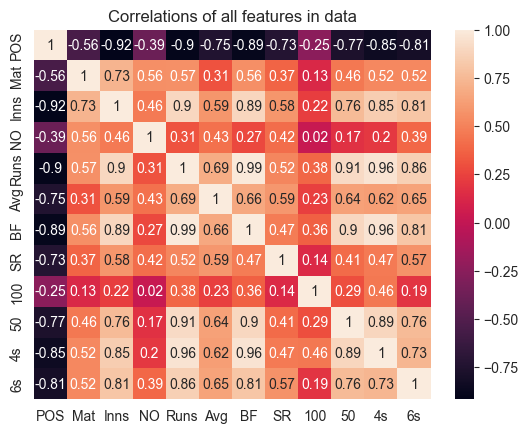

In [301]:
sns.heatmap(ipl_num.corr(),annot=True)
plt.title("Correlations of all features in data")
plt.show()

## Q5-Check the list of players who has an average greater than 50 as well strike rate above 120.

In [115]:
obove_avg_with_strike=ipl[(ipl["Avg"]>50) & (ipl["SR"]>120)]

In [116]:
obove_avg_with_strike

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
31,32,Kieron Pollard,16,12,7,268,60*,53.60,140,191.42,0,1,15,22
36,37,Wriddhiman Saha,4,4,1,214,87,71.33,153,139.86,0,2,24,5
37,38,Ruturaj Gaikwad,6,6,2,204,72,51.00,169,120.71,0,3,16,6
57,58,Deepak Hooda,7,5,4,101,62*,101.00,71,142.25,0,1,5,5
60,61,Tom Curran,5,4,3,83,54*,83.00,62,133.87,0,1,5,3


In [117]:
list(obove_avg_with_strike["Player"])

['KL Rahul',
 'Ishan Kishan',
 'Kieron Pollard',
 'Wriddhiman Saha',
 'Ruturaj Gaikwad',
 'Deepak Hooda',
 'Tom Curran']

In [121]:
players=list(obove_avg_with_strike["Player"])

In [122]:
players

['KL Rahul',
 'Ishan Kishan',
 'Kieron Pollard',
 'Wriddhiman Saha',
 'Ruturaj Gaikwad',
 'Deepak Hooda',
 'Tom Curran']

In [123]:
Avg_50=list(obove_avg_with_strike["Avg"])

In [124]:
Avg_50

[55.83, 57.33, 53.6, 71.33, 51.0, 101.0, 83.0]

In [125]:
SR_120=list(obove_avg_with_strike["SR"])

In [126]:
SR_120

[129.34, 145.76, 191.42, 139.86, 120.71, 142.25, 133.87]

In [128]:
players_axis=np.arange(len(players))

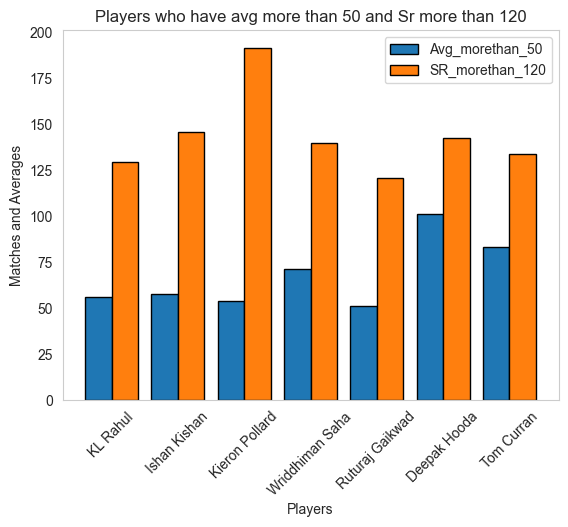

In [303]:
plt.bar(players_axis - 0.2,Avg_50, 0.4, label ="Avg_morethan_50",edgecolor="black",linewidth=1)
plt.bar(players_axis + 0.2,SR_120, 0.4, label ="SR_morethan_120",edgecolor="black",linewidth=1)
plt.xticks(players_axis, players,rotation=45)
plt.xlabel("Players")
plt.ylabel("Matches and Averages")
plt.title("Players who have avg more than 50 and Sr more than 120")
plt.grid(False)
plt.legend()
plt.show()

## Q6- check the list of players who has an average greater than 40 and balls faced above 100.


In [131]:
obove_avg_with_bf=ipl[(ipl["Avg"]>40) & (ipl["BF"]>100)]

In [132]:
obove_avg_with_bf

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
8,9,Virat Kohli,15,15,4,466,90*,42.36,384,121.35,0,3,23,11
9,10,AB de Villiers,15,14,4,454,73*,45.40,286,158.74,0,5,33,23
10,11,Faf du Plessis,13,13,2,449,87*,40.81,319,140.75,0,4,42,14
14,15,Eoin Morgan,14,14,4,418,68*,41.80,302,138.41,0,1,32,24
24,25,Kane Williamson,12,11,4,317,67,45.28,237,133.75,0,3,26,10
27,28,Chris Gayle,7,7,0,288,99,41.14,210,137.14,0,3,15,23
28,29,Ben Stokes,8,8,1,285,107*,40.71,200,142.50,1,1,36,7


In [135]:
list(obove_avg_with_bf["Player"])

['KL Rahul',
 'Shikhar Dhawan',
 'Ishan Kishan',
 'Virat Kohli',
 'AB de Villiers',
 'Faf du Plessis',
 'Eoin Morgan',
 'Kane Williamson',
 'Chris Gayle',
 'Ben Stokes',
 'Kieron Pollard',
 'Rahul Tewatia',
 'Ravindra Jadeja',
 'Wriddhiman Saha',
 'Ruturaj Gaikwad']

In [137]:
players_new=list(obove_avg_with_bf["Player"])
players_new

['KL Rahul',
 'Shikhar Dhawan',
 'Ishan Kishan',
 'Virat Kohli',
 'AB de Villiers',
 'Faf du Plessis',
 'Eoin Morgan',
 'Kane Williamson',
 'Chris Gayle',
 'Ben Stokes',
 'Kieron Pollard',
 'Rahul Tewatia',
 'Ravindra Jadeja',
 'Wriddhiman Saha',
 'Ruturaj Gaikwad']

In [138]:
Avg_40=list(obove_avg_with_bf["Avg"])
Avg_40

[55.83,
 44.14,
 57.33,
 42.36,
 45.4,
 40.81,
 41.8,
 45.28,
 41.14,
 40.71,
 53.6,
 42.5,
 46.4,
 71.33,
 51.0]

In [140]:
BF_100=list(obove_avg_with_bf["BF"])
BF_100

[518, 427, 354, 384, 286, 319, 302, 237, 210, 200, 140, 183, 135, 153, 169]

In [141]:
players_new_axis=np.arange(len(players_new))

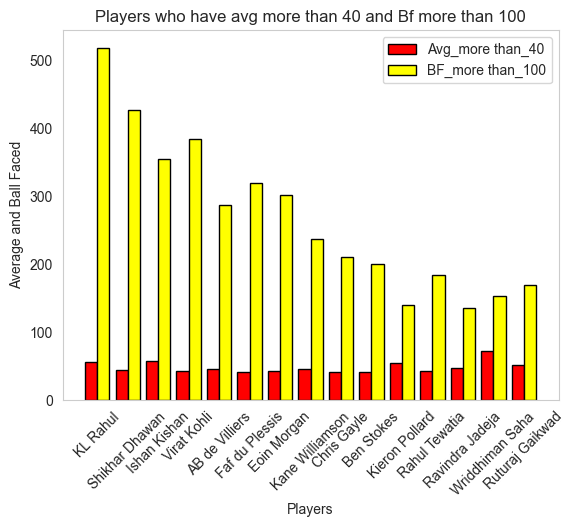

In [308]:
plt.bar(players_new_axis - 0.2,Avg_40, 0.4, label ="Avg_more than_40",edgecolor="black",linewidth=1,color="red")
plt.bar(players_new_axis + 0.2,BF_100, 0.4, label ="BF_more than_100",edgecolor="black",linewidth=1,color="yellow")
plt.xticks(players_new_axis,players_new,rotation=45)
plt.xlabel("Players")
plt.ylabel("Average and Ball Faced")
plt.title("Players who have avg more than 40 and Bf more than 100")
plt.grid(False)
plt.legend()
plt.show()

## Q7- Please check the list of players who scored more than 300 runs with an average greater than 45 & strike rate above 130.


In [150]:
obove_run_avg_and_sr=ipl[(ipl["Runs"]>300) & (ipl["Avg"]>45) & (ipl["SR"]>130)]

In [151]:
obove_run_avg_and_sr

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
9,10,AB de Villiers,15,14,4,454,73*,45.40,286,158.74,0,5,33,23
24,25,Kane Williamson,12,11,4,317,67,45.28,237,133.75,0,3,26,10


In [152]:
list(obove_run_avg_and_sr["Player"])

['Ishan Kishan', 'AB de Villiers', 'Kane Williamson']

In [153]:
players_new_1=list(obove_run_avg_and_sr["Player"])
players_new_1

['Ishan Kishan', 'AB de Villiers', 'Kane Williamson']

In [154]:
run_300=list(obove_run_avg_and_sr["Runs"])
run_300

[516, 454, 317]

In [155]:
Avg_45=list(obove_run_avg_and_sr["Avg"])
Avg_45

[57.33, 45.4, 45.28]

In [156]:
SR_130=list(obove_run_avg_and_sr["SR"])
SR_130

[145.76, 158.74, 133.75]

In [157]:
players_new_1_axis=np.arange(len(players_new_1))

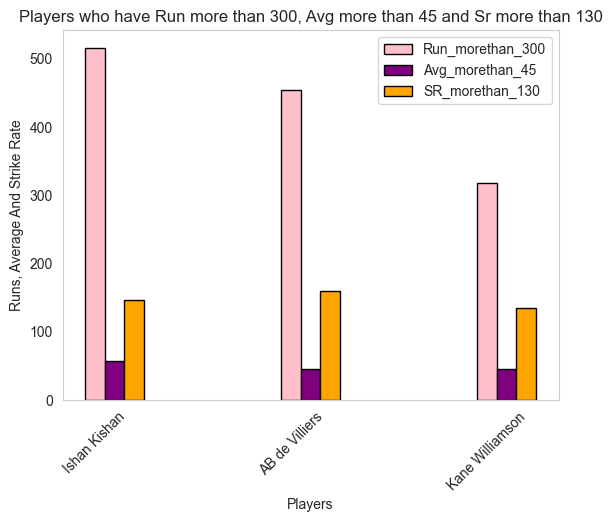

In [309]:
plt.bar(players_new_1_axis - 0.0,run_300, 0.1, label ="Run_morethan_300",edgecolor="black",linewidth=1,color="pink")
plt.bar(players_new_1_axis + 0.1,Avg_45, 0.1, label ="Avg_morethan_45",edgecolor="black",linewidth=1,color="purple")
plt.bar(players_new_1_axis + 0.2,SR_130, 0.1, label ="SR_morethan_130",edgecolor="black",linewidth=1,color="orange")
plt.xticks(players_new_1_axis,players_new_1,rotation=45)
plt.xlabel("Players")
plt.ylabel("Runs, Average And Strike Rate")
plt.title("Players who have Run more than 300, Avg more than 45 and Sr more than 130")
plt.grid(False)
plt.legend()
plt.show()

## Q8- Players who scroed alteast one century in this season.


In [184]:
scored_century=ipl[(ipl["100"]>0)]

In [185]:
scored_century

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
13,14,Mayank Agarwal,11,11,0,424,106,38.54,271,156.45,1,2,44,15
28,29,Ben Stokes,8,8,1,285,107*,40.71,200,142.50,1,1,36,7


In [187]:
list(scored_century["Player"])

['KL Rahul', 'Shikhar Dhawan', 'Mayank Agarwal', 'Ben Stokes']

In [188]:
players_new_2=list(scored_century["Player"])
players_new_2

['KL Rahul', 'Shikhar Dhawan', 'Mayank Agarwal', 'Ben Stokes']

In [193]:
atlest_1_100=list(scored_century["100"])
atlest_1_100

[1, 2, 1, 1]

In [194]:
players_new_2_axis=np.arange(len(players_new_2))

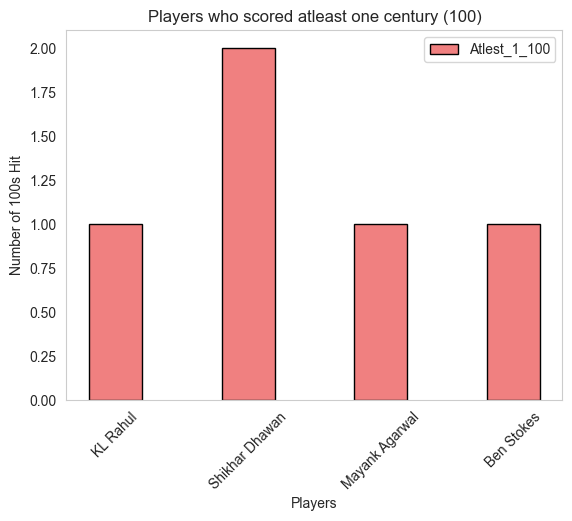

In [311]:
plt.bar(players_new_2_axis,atlest_1_100, 0.4, label ="Atlest_1_100",edgecolor="black",linewidth=1,color="lightcoral")
plt.xticks(players_new_2_axis,players_new_2,rotation=45)
plt.xlabel("Players")
plt.ylabel("Number of 100s Hit")
plt.title("Players who scored atleast one century (100)")
plt.grid(False)
plt.legend()
plt.show()

## Q9- Players who scored atleast 4 half centuries in this season.

In [202]:
scored_half_century=ipl[(ipl["50"]>3)]

In [203]:
scored_half_century

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
5,6,Quinton de Kock,16,16,2,503,78*,35.92,358,140.50,0,4,46,22
6,7,Suryakumar Yadav,16,15,3,480,79*,40.00,331,145.01,0,4,61,11
7,8,Devdutt Padikkal,15,15,0,473,74,31.53,379,124.80,0,5,51,8
9,10,AB de Villiers,15,14,4,454,73*,45.40,286,158.74,0,5,33,23
10,11,Faf du Plessis,13,13,2,449,87*,40.81,319,140.75,0,4,42,14


In [204]:
list(scored_half_century["Player"])

['KL Rahul',
 'Shikhar Dhawan',
 'David Warner',
 'Ishan Kishan',
 'Quinton de Kock',
 'Suryakumar Yadav',
 'Devdutt Padikkal',
 'AB de Villiers',
 'Faf du Plessis']

In [207]:
players_new_3=list(scored_half_century["Player"])
players_new_3

['KL Rahul',
 'Shikhar Dhawan',
 'David Warner',
 'Ishan Kishan',
 'Quinton de Kock',
 'Suryakumar Yadav',
 'Devdutt Padikkal',
 'AB de Villiers',
 'Faf du Plessis']

In [208]:
atlest_4_50=list(scored_half_century["50"])
atlest_4_50

[5, 4, 4, 4, 4, 4, 5, 5, 4]

In [209]:
players_new_3_axis=np.arange(len(players_new_3))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


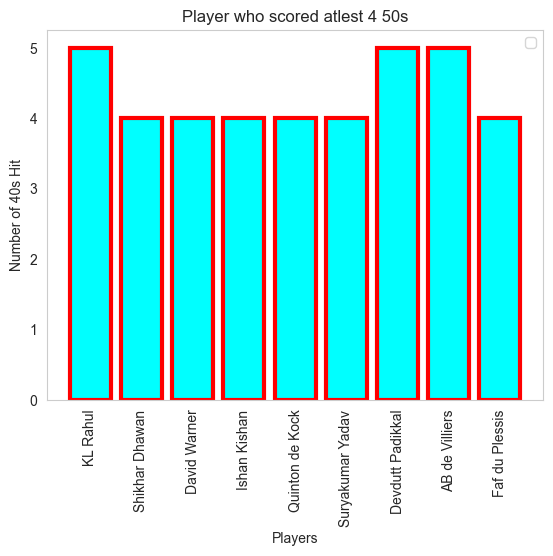

In [313]:
plt.bar(players_new_3,atlest_4_50,edgecolor="red",linewidth=3,color="cyan")
plt.xticks(players_new_3_axis,players_new_3,rotation=90)
plt.title("Player who scored atlest 4 50s")
plt.xlabel("Players")
plt.ylabel("Number of 40s Hit")
plt.grid(False)
plt.legend()
plt.show()

## Q10-Check the list of players who hit more than 45 boundaries and more than 10 sixes in this season.


In [226]:
selected_players = ipl[(ipl['4s'] > 45) & (ipl['6s'] > 10)]

In [227]:
selected_players

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
5,6,Quinton de Kock,16,16,2,503,78*,35.92,358,140.50,0,4,46,22
6,7,Suryakumar Yadav,16,15,3,480,79*,40.00,331,145.01,0,4,61,11


In [229]:
list(selected_players["Player"])

['KL Rahul',
 'Shikhar Dhawan',
 'David Warner',
 'Quinton de Kock',
 'Suryakumar Yadav']

In [230]:
players_new_4=list(selected_players["Player"])
players_new_4

['KL Rahul',
 'Shikhar Dhawan',
 'David Warner',
 'Quinton de Kock',
 'Suryakumar Yadav']

In [231]:
more_4s_40=list(selected_players["4s"])
more_4s_40

[58, 67, 52, 46, 61]

In [232]:
more_6s_10=list(selected_players["6s"])
more_6s_10

[23, 12, 14, 22, 11]

In [233]:
players_new_4_axis=np.arange(len(players_new_4))

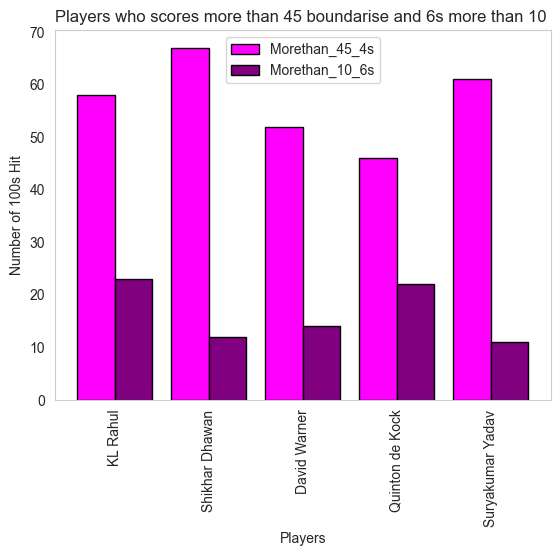

In [315]:
plt.bar(players_new_4_axis - 0.2,more_4s_40, 0.4, label ="Morethan_45_4s",edgecolor="black",linewidth=1,color="magenta")
plt.bar(players_new_4_axis + 0.2,more_6s_10, 0.4, label ="Morethan_10_6s",edgecolor="black",linewidth=1,color="purple")
plt.xticks(players_new_4_axis,players_new_4,rotation=90)
plt.title("Players who scores more than 45 boundarise and 6s more than 10 ")
plt.xlabel("Players")
plt.ylabel("Number of 100s Hit")
plt.grid(False)
plt.legend()
plt.show()

## Q11- Plot a histogram of number of matches played in a season by players.

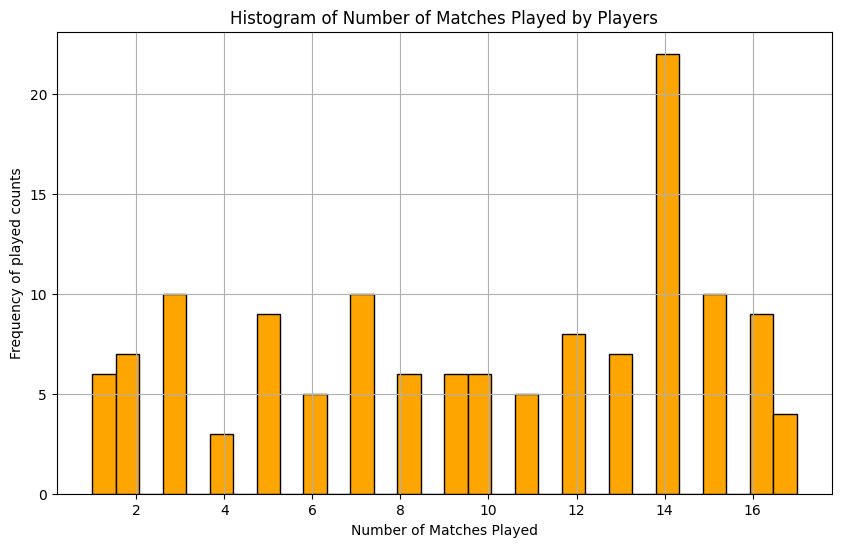

In [254]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(ipl['Mat'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of Number of Matches Played by Players')
plt.xlabel('Number of Matches Played')
plt.ylabel('Frequency of played counts')
plt.grid(True)
plt.show()

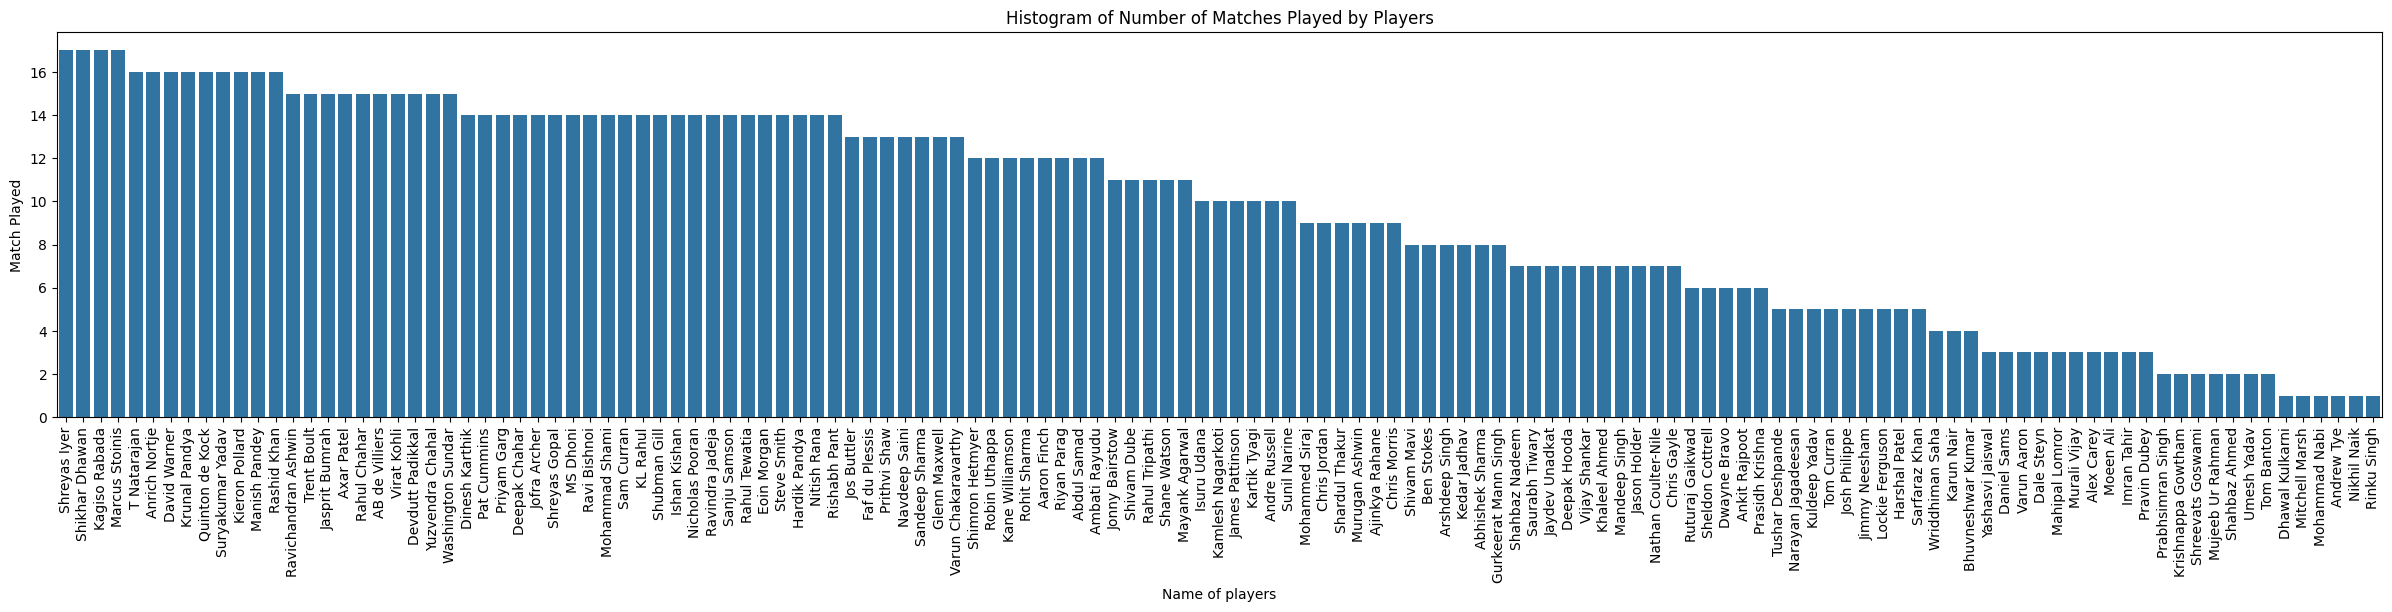

In [261]:
plt.figure(figsize=(30,5))
mat=ipl[["Player","Mat"]].sort_values("Mat", ascending = False)
ax = sns.barplot(x="Player", y="Mat", data=mat)
ax.set(xlabel = "Name of players",ylabel="Match Played")
plt.xticks(rotation=90)
plt.title('Histogram of Number of Matches Played by Players')
plt.show()

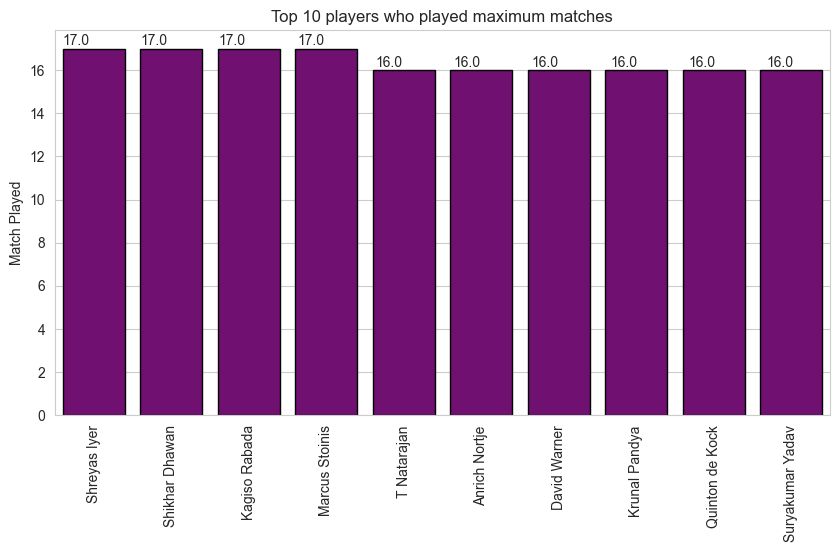

As we can see here (Shreyas iyer) has played the maximum match in the total data 


<Figure size 640x480 with 0 Axes>

In [317]:
plt.figure(figsize = (10,5))
mat_top10 = ipl[['Player','Mat']].sort_values('Mat', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Mat', data= mat_top10 ,edgecolor="black",linewidth=1,color="purple")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.title("Top 10 players who played maximum matches")
plt.show()
plt.tight_layout()
print("As we can see here (Shreyas iyer) has played the maximum match in the total data ")

# Q12- Plot the histogram of balls faced by players.

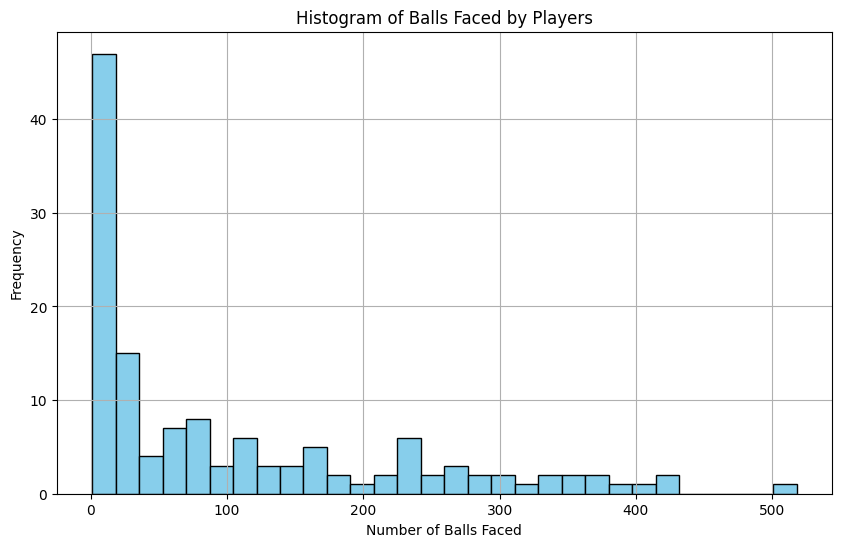

In [262]:
plt.figure(figsize=(10, 6))
plt.hist(ipl['BF'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Balls Faced by Players')
plt.xlabel('Number of Balls Faced')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

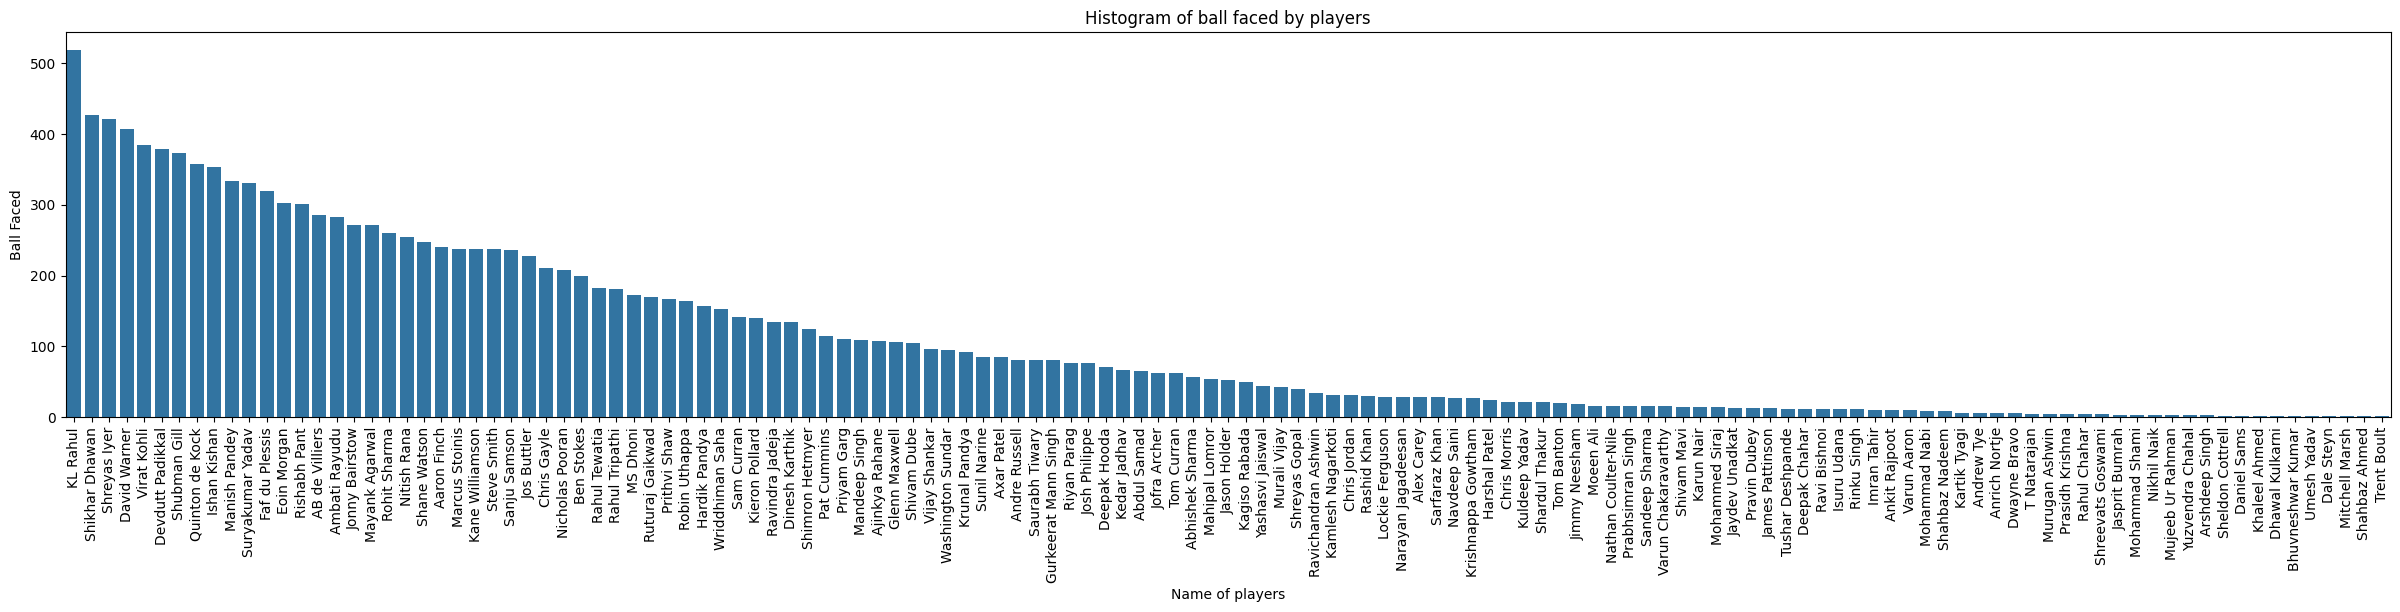

In [263]:
plt.figure(figsize=(30,5))
ball=ipl[["Player","BF"]].sort_values("BF", ascending = False)
ax = sns.barplot(x="Player", y="BF", data=ball)
ax.set(xlabel = "Name of players",ylabel="Ball Faced")
plt.xticks(rotation=90)
plt.title("Histogram of ball faced by players")
plt.show()

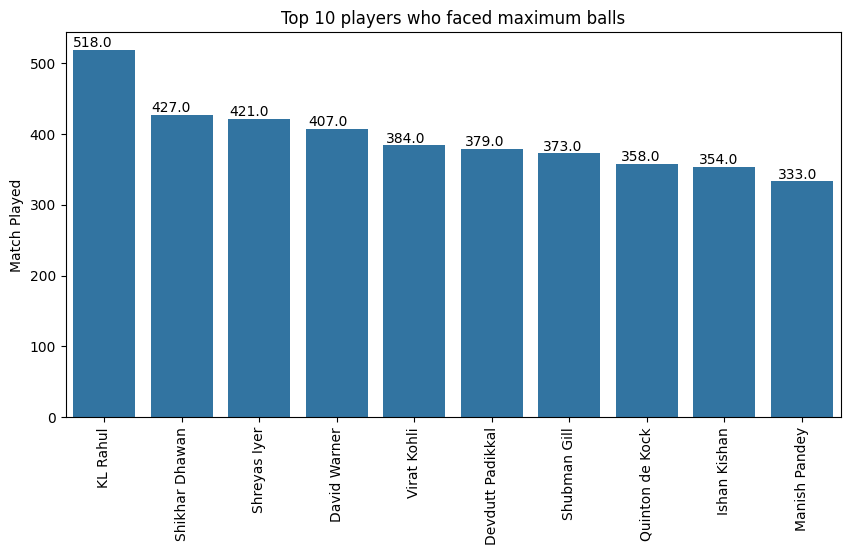

In [265]:
plt.figure(figsize = (10,5))
ball_top10 = ipl[['Player','BF']].sort_values('BF', ascending = False).head(10)
ax = sns.barplot(x='Player', y='BF', data= ball_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.title("Top 10 players who faced maximum balls")
plt.show()

## Q13- Top 30 players with most runs in a season v/s matches played.

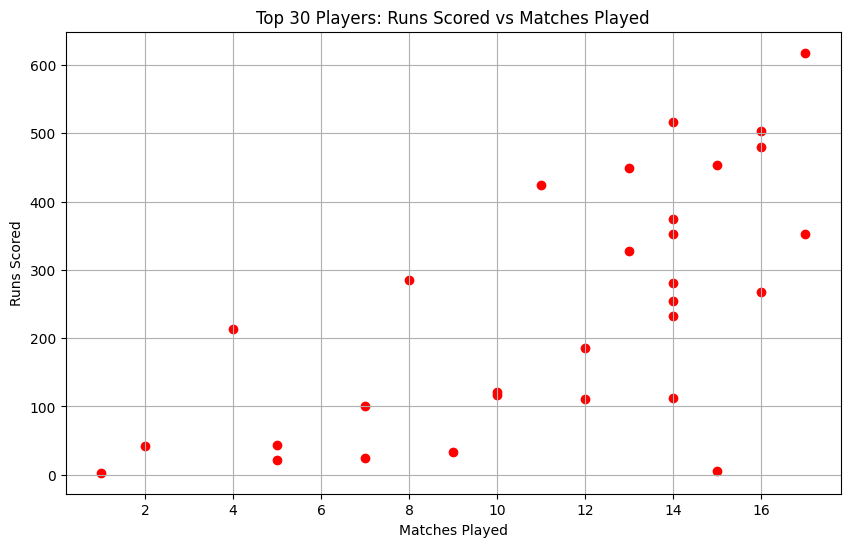

In [293]:
## sorted_df = ipl.sort_values(by='Runs', ascending=False)
top_30_players = sorted_df.head(30)
plt.figure(figsize=(10, 6))
plt.scatter(top_30_players['Mat'], top_30_players['Runs'], color='red')
plt.title('Top 30 Players: Runs Scored vs Matches Played')
plt.xlabel('Matches Played')
plt.ylabel('Runs Scored')
plt.grid(True)
plt.show()

## Q14-Bar chart for top 20 players with best strike rate in a season.

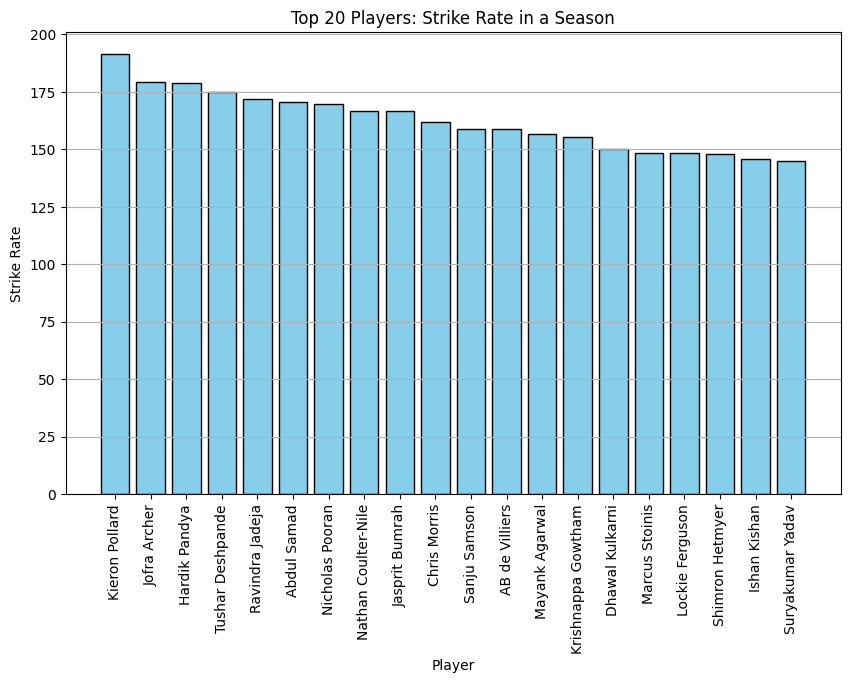

In [285]:
sorted_df = ipl.sort_values(by='SR', ascending=False)
# Select the top 20 players with the best strike rate
top_20_players = sorted_df.head(20)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_20_players['Player'], top_20_players['SR'], color='skyblue',edgecolor="black",linewidth=1)
plt.title('Top 20 Players: Strike Rate in a Season')
plt.xlabel('Player')
plt.ylabel('Strike Rate')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

## Q15- Top 30 players with highest number of sixes.

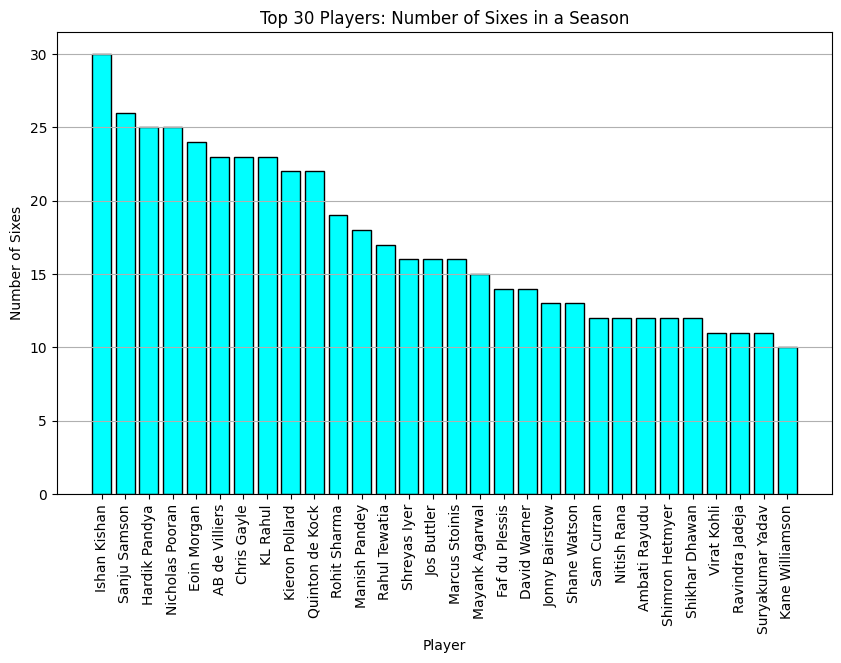

In [282]:
sorted_df = ipl.sort_values(by='6s', ascending=False)

# Select the top 30 players with the highest number of sixes
top_30_players = sorted_df.head(30)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_30_players['Player'], top_30_players['6s'], color='cyan',edgecolor="black",linewidth=1)
plt.title('Top 30 Players: Number of Sixes in a Season')
plt.xlabel('Player')
plt.ylabel('Number of Sixes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

## Q16- Scatter plot of runs scored by a player v/s balls faced in a season.

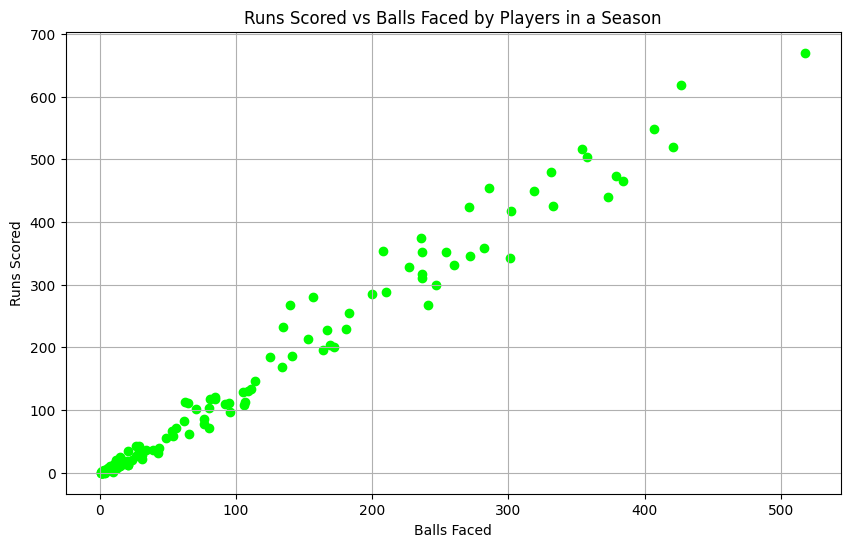

In [295]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ipl['BF'], ipl['Runs'], color='lime')
plt.title('Runs Scored vs Balls Faced by Players in a Season')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.grid(True)
plt.show()

## Q17- KDE plot for averages on a season.

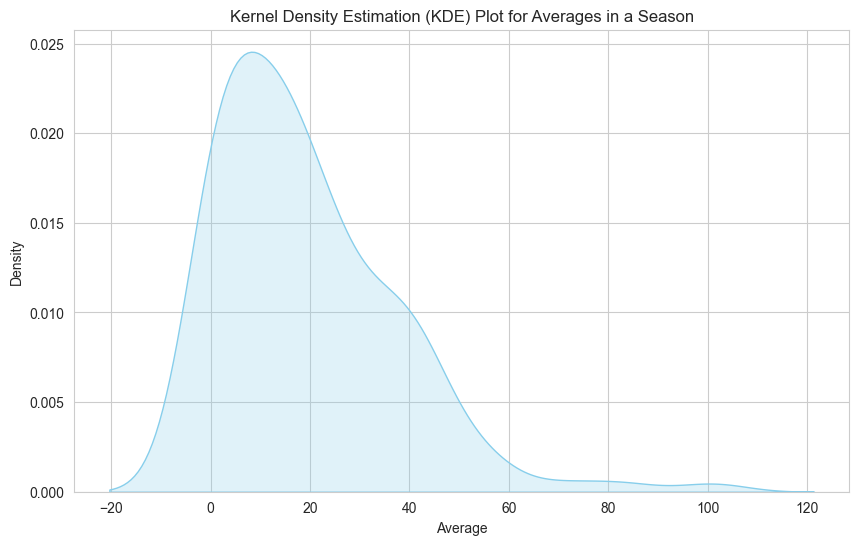

In [296]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create KDE plot for averages
plt.figure(figsize=(10, 6))
sns.kdeplot(ipl['Avg'], color='skyblue', fill=True)
plt.title('Kernel Density Estimation (KDE) Plot for Averages in a Season')
plt.xlabel('Average')
plt.ylabel('Density')
plt.show()